In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

<상식>
> Statistical Modeling: The Two Cultures  
Leo Breiman : 유명한 아저씨, RandomForest 만든 사람, 통계학에 큰 공헌한 사람  
http://www2.math.uu.se/~thulin/mm/breiman.pdf

In [ ]:
# 내용 둘러보기

dir(cv2.ml)

# 더미 데이터셋 생성

In [46]:
trainData = np.random.randint(0, 100, (25,2)).astype(np.float32)
responses = np.random.randint(0, 2, (25,1)).astype(np.float32)

In [47]:
from sklearn.datasets import make_classification

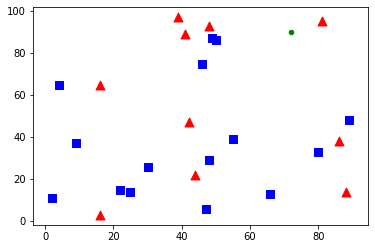

In [48]:
red = trainData[respenses.ravel()==0]
plt.scatter(red[:,0], red[:,1], 80, "r", "^")

blue = trainData[respenses.ravel()==1]
plt.scatter(blue[:,0], blue[:,1], 80, "b", "s")

newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0], newcomer[:,1], 80, "g", ".")

plt.show()

# ml
- openCV가 쬐에끔 더 빠르다.

In [49]:
knn = cv2.ml.KNearest_create()

In [50]:
# 학습

knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)

True

> - sklearn은 기본적으로 row 단위로 데이터가 들어있을 것이라고 가정했다.
- cv는 데이터가 어떻게 들어 있는지를 지정해줘야한다. (layout)
    - cv는 지정을 안하면 에러가 난다.
    - `cv2.ml`에 대문자(상수)로 들어 있다.
        - 상수 값을 보면 axis 개념과 같다.
        - `cv2.ml.ROW_SAMPLE` = 0
        - `cv2.ml.COL_SAMPLE` = 1

- cv는 flag라고 파라미터가 있으면 공식문서에서 찾아봐야 한다.. 
    - C 기반이라서 docstring이 불친절하다. 흑흑
    
- `responses`는 정답데이터.

In [51]:
# 찾기

knn.findNearest(newcomer, k=5)

(1.0,
 array([[1.]], dtype=float32),
 array([[1., 1., 1., 1., 0.]], dtype=float32),
 array([[106., 500., 538., 585., 901.]], dtype=float32))

In [52]:
ret, results, neighbours, dist = knn.findNearest(newcomer, k=5)

# iris 데이터로 실습

In [53]:
import imutils

In [54]:
from sklearn.datasets import load_iris

In [55]:
iris = load_iris()

In [56]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [57]:
knn = cv2.ml.KNearest_create()

In [58]:
# Error

knn.train(iris.data, cv2.ml.ROW_SAMPLE, iris.target.reshape((-1,1)))

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\ml\src\data.cpp:257: error: (-215:Assertion failed) samples.type() == CV_32F || samples.type() == CV_32S in function 'cv::ml::TrainDataImpl::setData'


> - 타입 때문에 에러가 난다.
- cv는 기본적으로 float32를 사용한다.

In [59]:
iris.data.dtype, iris.target.dtype, 

(dtype('float64'), dtype('int32'))

In [60]:
trainData = iris.data.astype(np.float32)
responses = iris.target.astype(np.float32)

In [61]:
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)

True

In [66]:
ret, results, neighbours, dist = knn.findNearest(trainData, k=5)

In [77]:
# Error

knn.findNearest([3,3,3,3], 3)

TypeError: Expected cv::UMat for argument 'samples'

> - matrix 형태로 넣으라고 한다.

In [74]:
# Error

knn.findNearest([[3,3,3,3]], 3)

TypeError: Expected cv::UMat for argument 'samples'

> - 입력했던 것처럼 matrix형태로 넣었는데 안된다.
- numpy array로 만들어야하나?

In [75]:
knn.findNearest(np.array([[3,3,3,3]]), 3)

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\ml\src\knearest.cpp:312: error: (-215:Assertion failed) test_samples.type() == CV_32F && test_samples.cols == samples.cols in function 'cv::ml::BruteForceImpl::findNearest'


> - array로 하니까 TypeError는 안난다.
- 또 dtype 에러가 났다.

In [76]:
knn.findNearest(np.float32([[3,3,3,3]]), 3)

(1.0,
 array([[1.]], dtype=float32),
 array([[2., 1., 1.]], dtype=float32),
 array([[7.8      , 8.06     , 8.2699995]], dtype=float32))

> - 어렵다 어려워... dtype을 맞추는게 중요하다...cv ml...

# 공식 예제

In [85]:
img = plt.imread("첨부파일/digits.png")

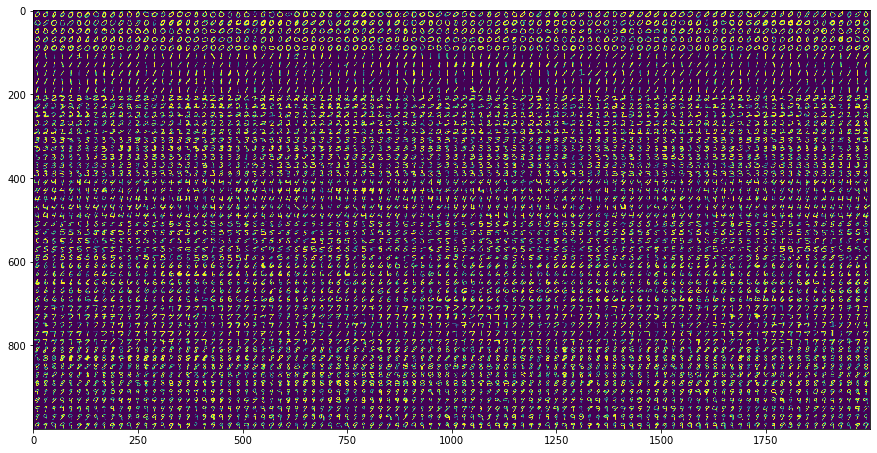

In [86]:
plt.figure(figsize=(15,15))
plt.imshow(img)

> - 전체 데이터를 이미지 하나로 만들어버림!
- 자바에서 많이 사용되는 기법.

In [90]:
img.shape

(1000, 2000)

In [123]:
cells = [np.hsplit(row,100) for row in np.vsplit(img,50)]

> - digits.png에는 가로에 100개, 세로에 50개 숫자 이미지가 있다

In [131]:
x = np.array(cells).astype(np.float32)

In [132]:
x.shape

(50, 100, 20, 20)

In [139]:
train = x.reshape(-1, 20*20)

In [140]:
train.shape

(5000, 400)

In [151]:
y = np.repeat(np.arange(10), 500).astype(np.float32)[:,np.newaxis]

> - 각 숫자가 500개씩 있으므로 repeat으로 y를 만들었다.
- newaxis로 2차원으로 만들었다.

In [133]:
train = x[:,:50].reshape(-1, 400).astype(np.float32)
test = x[:,50:100].reshape(-1, 400).astype(np.float32)

> - 가로세로 20x20 이미지이므로 `reshape(-1, 400)`은 `flatten`과 같다.

In [152]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, y)

True

In [153]:
ret, results, neighbours, dist = knn.findNearest(train, k=5)

In [154]:
# 맞은 개수

(results==y).flatten().sum()

4820

In [155]:
matches = results==y
correct = np.count_nonzero(matches)
accuracy = correct*100.0/results.size

In [156]:
accuracy

96.4

> - cv ml은 scikit 보다 좀 귀찮다.

In [ ]:
knn.calcError() # 수정 필요

> - cv의 `calcError`는 scikit에서의 score와 같다.

# sklearn에서도 똑같이 해보기

In [161]:
# 나중에 복습해보기

# Kmeans
기댓값 최대화 알고리즘(expectation-maximization algorithm, 약자 EM 알고리즘)

참고: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html 

In [164]:
cv2.kmeans

<function kmeans>

> - kmeans는 ml 패키지에 들어있지 않고 그냥 cv2에 있다.

In [163]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1,0)

flags = cv2.KMEANS_RANDOM_CENTERS

In [ ]:
compactness, labels, centers = cv2.kmeans(z, 2, None, criteria, 10, flags)